In [15]:
from matplotlib import pyplot, colors
import numpy as np
import random
import math

In [16]:
def generate_random_simple_tree(rows, cols, sub_branches):

  # empty grid
  initial = np.zeros((rows, cols)).astype(int)

  ## random trunk growth -- the base of the trunk can be placed anywhere between 30% and 70% of the size of the x-axis and can grow up to between 40% and 90% of the size of the y-axis
  trunk_x_start = random.randint(int(0.3*len(initial[0])), int(0.7*len(initial[0])))   
  trunk_y_stop = random.randint(int(0.4*len(initial)), int(0.9*len(initial)))          # can possibly use weights here to influence height of tree
  initial[-1][trunk_x_start] = 1
  initial[(len(initial)-trunk_y_stop):-1, trunk_x_start] = 1

  ## number of branches -- random number between 1 and the (height of the tree / 1.25)
  num_branches = random.randint(1, math.ceil(trunk_y_stop/1.5))

  ## how many branches branch to the left vs right
  right_branches = random.randint(1,num_branches)
  left_branches = num_branches - right_branches

  ## length of branches
  right_branch_lengths = []
  left_branch_lengths = []
  for i in range(right_branches):
    right_branch_lengths.append(random.randint(1,len(initial[0])-trunk_x_start))
  for j in range(left_branches):
    left_branch_lengths.append(random.randint(1, trunk_x_start))

  ## getting random placements of branches -- branches can be placed anywhere between 10% and 100% of the size of the trunk 
  right_branch_inds = []
  left_branch_inds = []
  excluded_inds = []
  for i in range(len(right_branch_lengths)):
    possible_inds = set([x for x in range(math.ceil(0.1*trunk_y_stop), trunk_y_stop)]) - set(excluded_inds)
    ind = random.choice(list(possible_inds))
    right_branch_inds.append(ind)
    excluded_inds.append(ind)

  excluded_inds = []
  for j in range(len(left_branch_lengths)):
    possible_inds = set([x for x in range(math.ceil(0.1*trunk_y_stop), trunk_y_stop)]) - set(excluded_inds)
    ind = random.choice(list(possible_inds))
    left_branch_inds.append(ind)
    excluded_inds.append(ind)

  ## placing right branches
  for i in range(right_branches):
    initial[len(initial)-right_branch_inds[i]-1, trunk_x_start:(trunk_x_start+right_branch_lengths[i]+1)] = 1

  # placing left branches
  for j in range(left_branches):
    initial[len(initial)-1-left_branch_inds[j], (trunk_x_start-left_branch_lengths[j]):trunk_x_start] = 1

  if sub_branches == 1:
    ## adding sub-branches on the right side
    # choosing the branches that have sub-branches
    sub_branches_right = []
    for branch_length in right_branch_lengths:
      if branch_length < 2:
        sub_branches_right.append(0)
      else:
        sub_branches_right.append(random.choice([0,1]))
    # generating lengths of sub-branches
    right_sub_branch_lengths = []
    for ind, i in enumerate(sub_branches_right):
      if i == 1:
        right_sub_branch_lengths.append(random.randint(1, math.ceil(right_branch_lengths[ind]/2)))    # sub-branch can be a maximium of 50% of the length of its parent branch
      else:
        right_sub_branch_lengths.append(0)
    # placing sub-branches
    for ind, branch in enumerate(sub_branches_right):
      if right_sub_branch_lengths[ind] != 0:
        initial[len(initial)-right_branch_inds[ind]-right_sub_branch_lengths[ind]:len(initial)-right_branch_inds[ind]-1, trunk_x_start+right_branch_lengths[ind]-1] = 1
        initial[len(initial)-right_branch_inds[ind]:len(initial)-right_branch_inds[ind]+right_sub_branch_lengths[ind]-1, trunk_x_start+right_branch_lengths[ind]-1] = 1
    
    ## adding sub-branches on the left side
    # choosing the branches that have sub-branches
    sub_branches_left = []
    for branch_length in left_branch_lengths:
      if branch_length < 2:
        sub_branches_left.append(0)
      else:
        sub_branches_left.append(random.choice([0,1]))
    # generating lengths of sub-branches
    left_sub_branch_lengths = []
    for ind, i in enumerate(sub_branches_left):
      if i == 1:
        left_sub_branch_lengths.append(random.randint(1, math.ceil(left_branch_lengths[ind]/2)))    # sub-branch can be a maximium of 50% of the length of its parent branch
      else:
        left_sub_branch_lengths.append(0)
    # placing sub-branches
    for ind, branch in enumerate(sub_branches_left):
      if left_sub_branch_lengths[ind] != 0:
        initial[len(initial)-left_branch_inds[ind]-left_sub_branch_lengths[ind]:len(initial)-left_branch_inds[ind]-1, trunk_x_start-left_branch_lengths[ind]+1] = 1
        initial[len(initial)-left_branch_inds[ind]:len(initial)-left_branch_inds[ind]+left_sub_branch_lengths[ind]-1, trunk_x_start-left_branch_lengths[ind]+1] = 1

  return initial

In [17]:
def place_disease(tree):
  branch_pixel_inds = []
  tree_base_x_coord = list(tree[-1]).index(1)
  for row, i in enumerate(tree):
    for col, j in enumerate(i):
      if j == 1 and col != tree_base_x_coord:
        branch_pixel_inds.append([row, col])
  
  random_disease_start = random.choice(branch_pixel_inds)
  tree[random_disease_start[0], random_disease_start[1]] = 2

  return tree

In [18]:
def visualize_tree(tree):
  pyplot.figure(figsize=(len(tree), len(tree[0])))
  colormap = colors.ListedColormap(["skyblue", "saddlebrown", "yellow"])
  pyplot.xticks([]), pyplot.yticks([])
  pyplot.imshow(tree, cmap=colormap)
  pyplot.show()

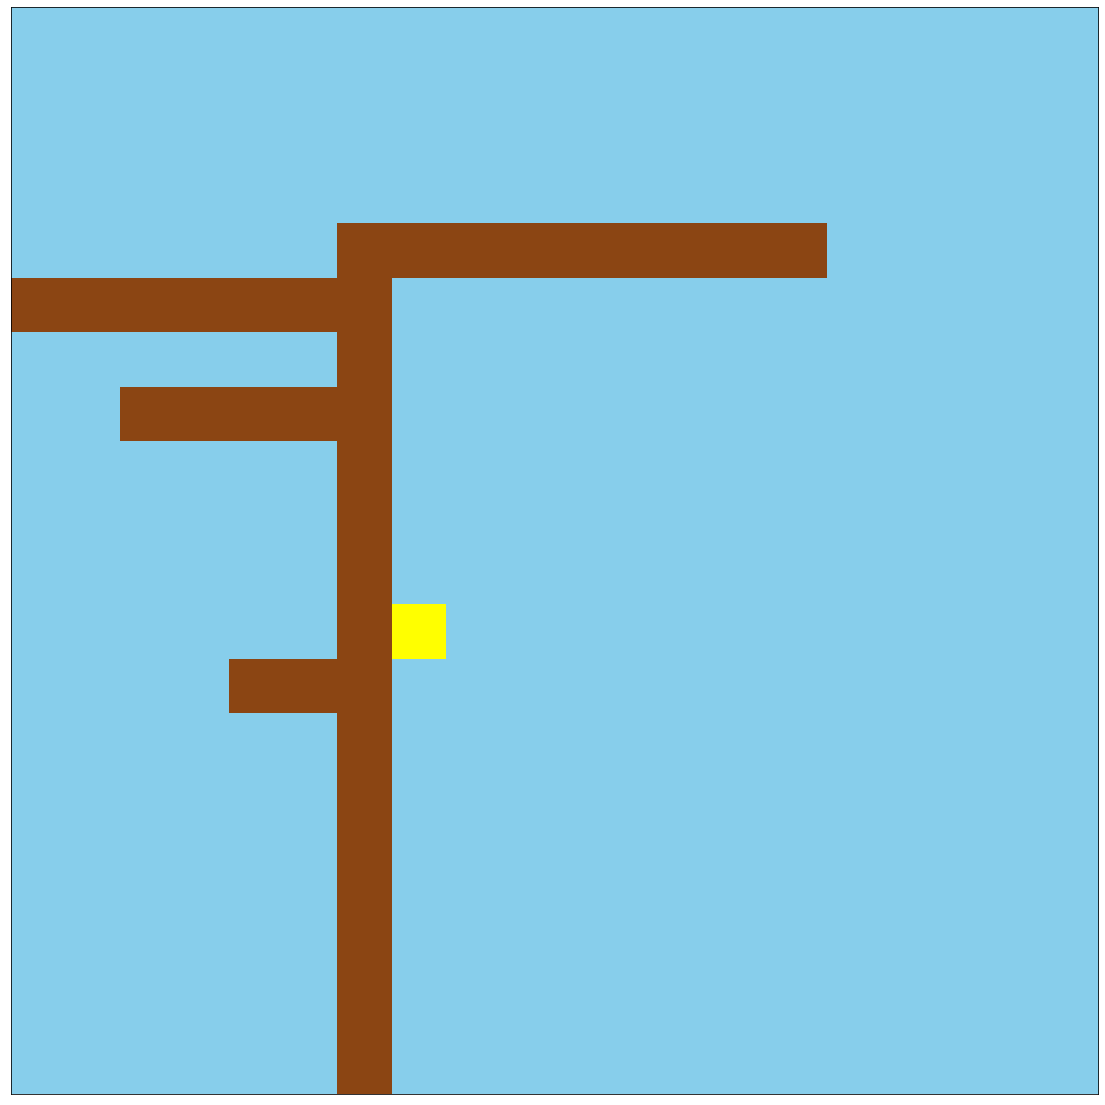

In [29]:
newTree = generate_random_simple_tree(20, 20, 0)
newTree = place_disease(newTree)
visualize_tree(newTree)